<a href="https://colab.research.google.com/github/MoMahmoud8/practise-nlp/blob/main/Sentiment_Analysis_for_movie_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install patool
import patoolib
patoolib.extract_archive("/content/movie_data.zip")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached patool-1.12-py2.py3-none-any.whl (77 kB)
patool: Extracting /content/movie_data.zip ...
patool: running /usr/bin/7z x -o./Unpack_st35ba57 -- /content/movie_data.zip
patool: ... /content/movie_data.zip extracted to `movie_data'.


'movie_data'

In [3]:
import numpy as np
import pandas as pd
import os , re
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stop_words = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
reviews_train = []
for line in open(r'movie_data/full_train.txt', 'r',encoding = 'utf-8'):
    
    reviews_train.append(line.strip())
    
reviews_test = []
for line in open(r'movie_data/full_test.txt', 'r',encoding = 'utf-8'):
    
    reviews_test.append(line.strip())
    
target = [1 if i < 12500 else 0 for i in range(25000)]

In [7]:
len(reviews_train)

25000

## Preprocessing

In [8]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews


def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split()  if word not in english_stop_words]))
    return removed_stop_words


def get_stemmed_text(corpus):
    stemmer = PorterStemmer()

    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]


reviews_train_clean = preprocess_reviews(reviews_train)
reviews_test_clean = preprocess_reviews(reviews_test)
reviews_train_clean = remove_stop_words(reviews_train)
reviews_test_clean = remove_stop_words(reviews_test)
reviews_train_clean = get_stemmed_text(reviews_train)
reviews_test_clean = get_stemmed_text(reviews_test)

LogisticRegression using CountVectorizer

In [45]:
cv = CountVectorizer(binary=True,ngram_range=(1, 2))
cvtrain = cv.fit_transform(reviews_train_clean)
cvtest = cv.transform(reviews_test_clean)

cvX_train, cvX_val, y_train, y_val = train_test_split(cvtrain, target, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(cvX_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(cvX_val))))

Accuracy for C=0.01: 0.88192
Accuracy for C=0.05: 0.88768


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for C=0.25: 0.88784


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for C=0.5: 0.88784
Accuracy for C=1: 0.88784


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


we got the best accuracy when c=0.05

In [46]:
final_model = LogisticRegression(C=0.25)
final_model.fit(cvtrain, target)
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_model.predict(cvtest)))

Final Accuracy: 0.89832


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

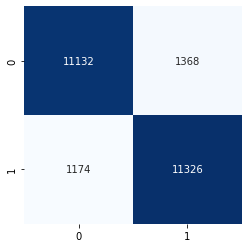

In [47]:
import seaborn as sns

from sklearn.metrics import confusion_matrix


matrix_confusion = confusion_matrix(target, final_model.predict(cvtest))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)


LogisticRegression with TfidfVectorizer 

In [48]:
tfidf_vectorizer = TfidfVectorizer()
tftrain = tfidf_vectorizer.fit_transform(reviews_train_clean)
tftest = tfidf_vectorizer.transform(reviews_test_clean)

In [49]:
tfX_train, tfX_val, y_train, y_val = train_test_split(tftrain, target, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(tfX_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(tfX_val))))

Accuracy for C=0.01: 0.78816
Accuracy for C=0.05: 0.83136
Accuracy for C=0.25: 0.8664
Accuracy for C=0.5: 0.87968
Accuracy for C=1: 0.888


In [50]:
final_model = LogisticRegression(C=1)
final_model.fit(tftrain, target)
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_model.predict(tftest)))

Final Accuracy: 0.87788


<Axes: >

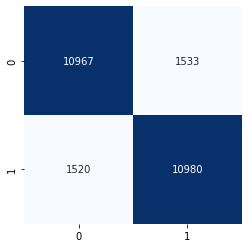

In [51]:
matrix_confusion = confusion_matrix(target, final_model.predict(tftest))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [ ]:
# def get_lemmatized_text(corpus):
    
#     lemmatizer = WordNetLemmatizer()
#     return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

# lemmatized_reviews_train = get_lemmatized_text(reviews_train_clean)
# lemmatized_reviews_test = get_lemmatized_text(reviews_test_clean)

## SVM with CountVectorizer

In [52]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm = LinearSVC(C=c)
    svm.fit(cvX_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(cvX_val))))

Accuracy for C=0.01: 0.504
Accuracy for C=0.05: 0.50144


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy for C=0.25: 0.50208


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy for C=0.5: 0.50112
Accuracy for C=1: 0.49936


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [53]:
final_svm_ngram = LinearSVC(C=0.05)
final_svm_ngram.fit(X, target)
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_svm_ngram.predict(cvtest)))

Final Accuracy: 0.89356


<Axes: >

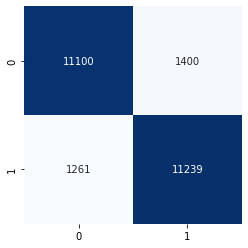

In [54]:
matrix_confusion = confusion_matrix(target, final_svm_ngram.predict(cvtest))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)


## SVM with tfidfVectorizer

In [55]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm = LinearSVC(C=c)
    svm.fit(tfX_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(tfX_val)))) 
    

Accuracy for C=0.01: 0.84336
Accuracy for C=0.05: 0.88016
Accuracy for C=0.25: 0.89632
Accuracy for C=0.5: 0.89776
Accuracy for C=1: 0.8984


In [56]:
final_svm_ngram = LinearSVC(C=0.5)
final_svm_ngram.fit(tftrain, target)
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_svm_ngram.predict(tftest)))

Final Accuracy: 0.87744


<Axes: >

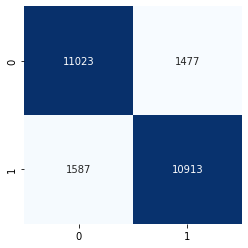

In [57]:
matrix_confusion = confusion_matrix(target, final_svm_ngram.predict(tftest))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
